In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
# Exceptions in file handling
def read_safely(path):
  error = None
  try:
    con_df = pd.read_csv(path,encoding = "ISO-8859-1")
    return con_df
  except FileNotFoundError as err:
    print("File %s does not exist. Try again." % path)

In [3]:
def clean_df(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column]).dt.date
    df[date_column] = df[date_column] - pd.to_timedelta(7, unit='d')
    df_by_week = df.groupby([date_column]).count().reset_index()
    return df_by_week

In [4]:
def get_sent_receive_invites(df, direction_column):
    invites_sent = df[df[direction_column] == 'OUTGOING']
    invites_received = df[df[direction_column] == 'INCOMING']
    return invites_sent, invites_received

In [5]:
def plot(df, x,y, xlabel, ylabel, title, fig_size, fig_color):
    fig,ax= plt.subplots(nrows=1)
    ax.bar(df[x],df[y], color = fig_color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.set_size_inches(fig_size)
    return

In [6]:
def import_recruiters_contacts(path):
    contacts_df = read_safely('./connections.csv')
    words = ['Recruiter', 'Talent', 'Sourcer', 'Recruiting']
    contacts_df['Position'] = contacts_df['Position'].dropna().apply(lambda x: 'Recruiter' if 
                                                   (any(word in x for word in words)) else x,1)
    recruiters_df = contacts_df[contacts_df['Position'] == 'Recruiter']
    return recruiters_df

In [7]:
#Calling the functions 
con_df = read_safely('./connections.csv')
con_df_by_week = clean_df(con_df, 'Connected On')
invites_df = read_safely('Invitations.csv')
invites_sent, invites_received = get_sent_receive_invites(invites_df, 'Direction')
invites_sent_by_week = clean_df(invites_sent, 'Sent At')
invites_received_by_week = clean_df(invites_received, 'Sent At')

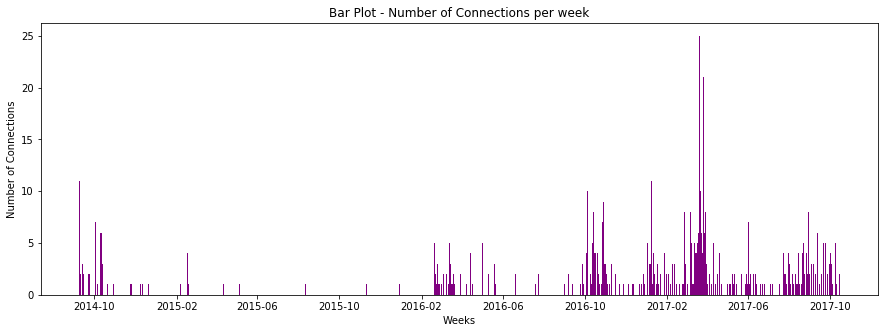

In [70]:
plot(con_df_by_week,'Connected On','Email Address', 'Weeks', 
     'Number of Connections', 'Bar Plot - Number of Connections per week', 
     (15,5), 'purple')

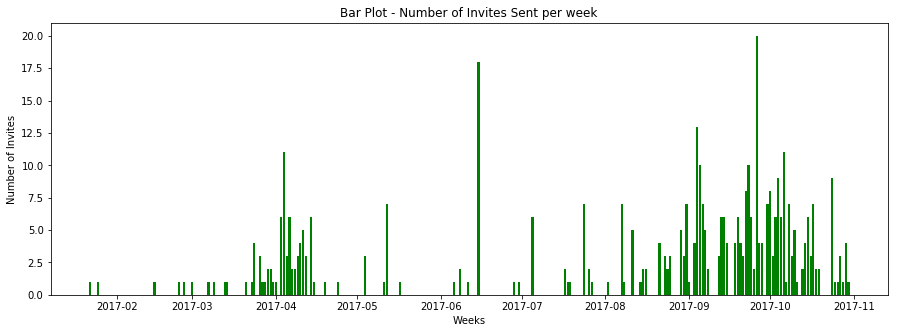

In [71]:
plot(invites_sent_by_week,'Sent At','From', 'Weeks', 
     'Number of Invites', 'Bar Plot - Number of Invites Sent per week', 
     (15,5), 'green')

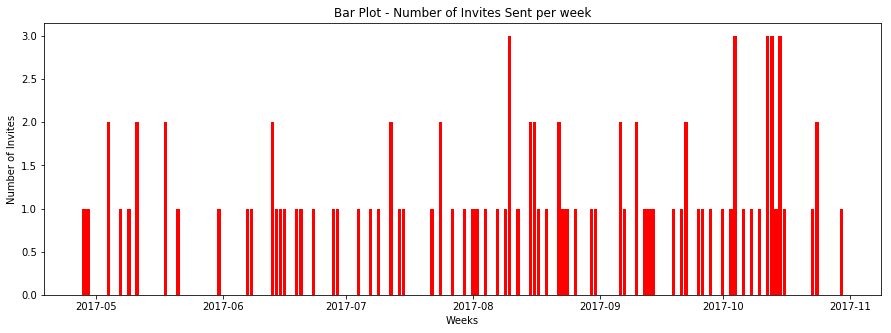

In [74]:
plot(invites_received_by_week,'Sent At','From', 'Weeks', 
     'Number of Invites', 'Bar Plot - Number of Invites Sent per week', 
     (15,5), 'red')

In [117]:
import_recruiters_contacts('Connections.csv')

,First Name,Last Name,Email Address,Company,Position,Connected On,Tags
1,Tracie,Connors,tracieco@lab126.com,Amazon Lab126,Recruiter,"4/12/17, 11:24 AM",NaN
2,Isabel,Sarkis,isarkis@nvidia.com,NVIDIA,Recruiter,"6/5/17, 9:44 PM",NaN
3,Owen,Byron,jobscout@att.net,Cohesity,Recruiter,"5/22/17, 4:02 PM",NaN
5,Cory,Simmonsen,corysim@me.com,Best Buy,Recruiter,"1/30/17, 9:24 PM",NaN
6,Hermann,Kepfer,Hkepfer@gmail.com,RAND Corporation,Recruiter,"4/6/16, 4:32 AM",NaN
7,Beth,Kester-Warner,bethkw@extrahop.com,ExtraHop,Recruiter,"10/26/16, 7:52 PM",NaN
8,Nancy,Newton,nancynew@microsoft.com,Microsoft,Recruiter,"5/18/17, 7:26 AM",NaN
9,Missy,Roedersheimer Waggoner,mroeders@yahoo.com,Apptio Software,Recruiter,"3/30/17, 4:18 PM",NaN
11,Revathi,Iyer,revathi.iyer@bloomenergy.com,Bloom Energy,Recruiter,"5/15/17, 10:23 AM",NaN
12,Lorise,Best Morton,lorise16@gmail.com,Nike,Recruiter,"4/18/17, 10:56 AM",NaN
